# Introduction to Neutrino Oscillations

Most neutrino oscillation results are consistent with the three-flavour neutrino framework, but recent experimental anomalies have motivated a search for light, sterile neutrinos. One such anomaly includes the gallium anomaly, given by results from SAGE and BEST, which detected a deficit of $\nu_{e}$ from radioactive sources. These results could be explained by the disappearance of neutrinos via oscillation into a sterile state, the discovery of which would have far-reaching implications in fundemental physics.

MicroBooNE's detector is a liquid argon time projection chamber with dimensions of 10.4 m in length, 2.6 m in width, and 2.3 m in height. The neutrino beam is generated by a beryllium target, found 468.5 m from the detector, which is struck by protons. This produces secondary hadrons which, in turn, produce a neutrino beam through their decay. Interactions that occur within the detector are detected by three wire planes, each orientated in a different direction.

The purpose of this experiment is to evaluate the possible existence of sterile neutrinos by considering $\nu_{\mu}$ disappearance using MicroBooNE data. Finally, to compare the excluded variable parameter space to previous MiniBooNE and LSND results.


# Theory

### 3-Flavour Oscillation:
Neutrinos are neutral, spin-1/2 particles and can have three different flavours: electron, muon and tau. As a solution to the `Solar Neutrino Problem', the idea of neutrino oscillations was introduced. This idea postulates that neutrino flavour eigenstates exist in a superposition of mass eigenstates, governed by the PMNS matrix, $U^{\mathrm{PMNS}}$. This superposition is given by
$$
\begin{pmatrix}
    \nu_{e} \\
    \nu_{\mu} \\
    \nu_{\tau}
\end{pmatrix} = U^{\mathrm{PMNS}} \begin{pmatrix}
    \nu_{1} \\
    \nu_{2} \\
    \nu_{3}
\end{pmatrix},
$$
where $\nu_{e,\mu,\tau}$ are the flavour eigenstates and $\nu_{1,2,3}$ are the mass eigenstates. In the two-flavour approximation, this is written as
$$
\begin{pmatrix}
    \nu_{\alpha} \\
    \nu_{\beta} 
\end{pmatrix} = \begin{pmatrix}
    \cos\theta & \sin\theta \\
    -\sin\theta & \cos\theta
\end{pmatrix} \begin{pmatrix}
    \nu_{1} \\
    \nu_{2}
\end{pmatrix},
$$

where $\theta$ is known as the mixing angle. The time propagation of the state is given by
$$
\left\lvert \nu(t=0)\right\rangle = \left\lvert \nu_{\alpha} \right\rangle = \cos\theta\left\lvert\nu_{1}\right\rangle + \sin\theta\left\lvert\nu_{2}\right\rangle,
$$

$$
\left\lvert \nu(t)\right\rangle =  e^{q_{1} \cdot x}\cos\theta\left\lvert\nu_{1}\right\rangle + e^{q_{2} \cdot x}\sin\theta\left\lvert\nu_{2}\right\rangle,
$$
where $q_{1,2}$ are the time propagated four-momenta. Using these equations, the probability of two-flavour oscillation is calculated to be 
$$
P(\nu_{\alpha \rightarrow \beta}) = \sin^{2}(2\theta)\sin^{2}\left(1.27\frac{\Delta m_{21}^{2}(\mathrm{eV})^2L(\mathrm{km})}{E(\mathrm{GeV})}\right)
$$
where $\Delta m_{21}^{2}$ is the squared mass splitting, $L$ is the distance travelled by the neutrino and $E$ is the neutrino energy.


### 3+1 Active-To-Sterile Framework:
The 3+1 framework assumes the existence of a fourth, sterile neutrino $\nu_{s}$ and now the original PMNS is modified to be
$$
\begin{pmatrix}
    \nu_{e} \\
    \nu_{\mu} \\
    \nu_{\tau} \\
    \nu_{s}
\end{pmatrix} = \begin{pmatrix}
    U_{e1} & U_{e2} & U_{e3} & U_{e4}\\
    U_{\mu1} & U_{\mu2} & U_{\mu3} & U_{\mu4}\\
    U_{\tau1} & U_{\tau2} & U_{\tau3} & U_{\tau4}\\
    U_{s1} & U_{s2} & U_{s3} & U_{s4}
\end{pmatrix} \begin{pmatrix}
    \nu_{1} \\
    \nu_{2} \\
    \nu_{3} \\
    \nu_{4}
\end{pmatrix}.
$$
To compare to MiniBooNE and LSND analyses, it is required that $\nu_{\mu}$ disappearance parameter space be converted into $\nu_{e}$ appearance parameter space. Using the relevant matrix elements $U_{e4}$ and $U_{\mu4}$, the probability of oscillation is now given by
$$
P(\nu_{\mu \rightarrow e}) = \sin^{2}(2\theta_{\mu e})\sin^{2}\left(1.27\frac{\Delta m_{14}^{2}L}{E}\right),
$$
where all quantities are in the units stated previously.

## About this Notebook

This is the notebook used to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.


# All imports

In [99]:
import numpy as np
import uproot3
import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import Neutrino_functions

from math import *
import scipy as sci

# MACHINE LEARNING IMPORTS
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
pd.__version__

import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

# Opening the MC and data frames

In [68]:
# MC
MC_file = './MC_EXT_flattened.pkl'

# Data
data_file = './data_flattened.pkl'


# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# removing 'Subevent' from data
MC_EXT = MC_EXT.drop('Subevent', axis = 1)
data = data.drop('Subevent', axis = 1)

data.head()

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584
3,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191
10,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217
11,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849


# Machine learning for Particle Classification

First, look at a sub-sample of our Monte Carlo data.

In [69]:
# Reduce the amount of data for visualisation purposes
MC_EXT_VIS = MC_EXT.sample(int(len(MC_EXT)/10))

# Resetting the index
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Removing high energy (unphysical) monte carlo results
MC_EXL_VIS = MC_EXT_VIS.drop(MC_EXT_VIS[MC_EXT_VIS.trk_energy_tot > 2].index, inplace = True)

# Resetting the index again
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Displaying dataframe
print("Length of new data sample: {}".format(len(MC_EXT_VIS)))
MC_EXT_VIS.head(10)


Length of new data sample: 14346


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,weight
0,121.778745,28.842287,23.251101,21,0.998729,569.332397,-25.286934,47.018017,0.020928,0.886298,544.807373,-12.44717,41.059921,31.017908,-5.499227,525.189209,1.289290,0.158957
1,18.303133,13.465376,24.490831,21,0.065391,557.890686,-88.302299,240.186752,0.023345,0.622886,563.88269,-85.02533,230.120789,205.990341,-77.188118,567.518372,0.869824,0.158957
2,82.319661,86.96579,134.507217,4,0.006090,373.238068,-72.857758,213.067993,0.935818,0.733589,393.975739,-17.334881,161.805435,94.697823,89.811798,354.811676,1.413878,0.158957
3,0.250646,131.039032,0.250646,7,0.040879,448.310699,81.994362,62.895126,0.998408,0.952661,448.448273,-44.327007,78.847603,78.798859,-44.424526,448.675934,0.421262,0.257732
4,184.230472,13.379696,0.593434,21,0.900756,700.0672,25.971371,147.275024,0.234286,0.368817,693.142639,19.663256,138.441818,138.054871,19.188482,693.273376,0.814494,0.158957
5,88.071658,98.730637,0.290172,21,0.571074,863.558289,76.962769,144.486008,0.996349,0.949981,796.940247,20.257927,99.095772,99.006027,19.993521,796.851990,0.906559,0.158957
6,24.524859,21.911249,0.382818,21,0.999261,464.970245,-101.607964,86.560715,0.920033,0.094948,459.487,-88.819832,69.687485,69.429726,-88.514343,459.532776,0.572041,0.158957
7,150.124563,61.112988,2.388267,21,0.917328,53.463928,-56.92506,187.348267,0.90368,0.791221,30.141354,-78.16069,239.617889,241.479172,-77.533760,28.462843,1.302798,0.158957
8,166.639248,293.689575,1.00268,21,0.563765,847.490845,-44.415123,38.613335,1.0,0.979119,689.619446,80.552307,247.050049,247.773682,80.715172,688.937927,0.896652,0.187823
9,110.614371,64.252533,0.250507,7,0.060848,757.850281,108.245117,61.370125,0.995727,0.908358,736.765137,49.279446,72.106476,72.230133,49.412621,736.941345,0.383709,0.257732


# Data Visualisation
Visualise some of the variables using *seaborn*

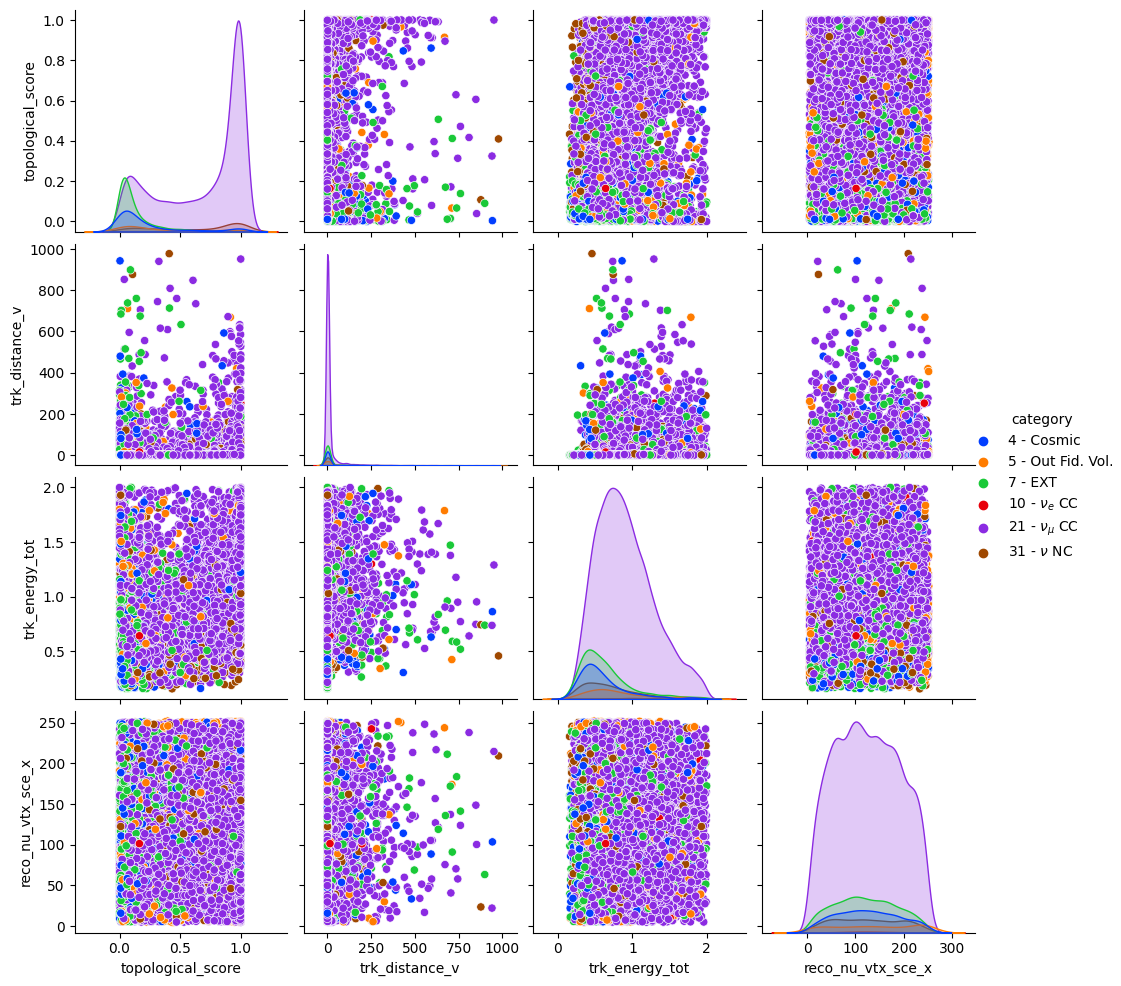

In [70]:
# Visualising a couple of variables.
variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# List of categories in text
ptype = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu_{\mu}$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

In [71]:
# Create a deep copy of MC_EXT_VIS without signal events
dc_MC_EXT_VIS = MC_EXT_VIS.copy(deep=True)
dc_MC_EXT_VIS.drop(dc_MC_EXT_VIS[dc_MC_EXT_VIS.category == 21].index, inplace = True)

dc_MC_EXT_VIS.reset_index(drop=True, inplace=True)

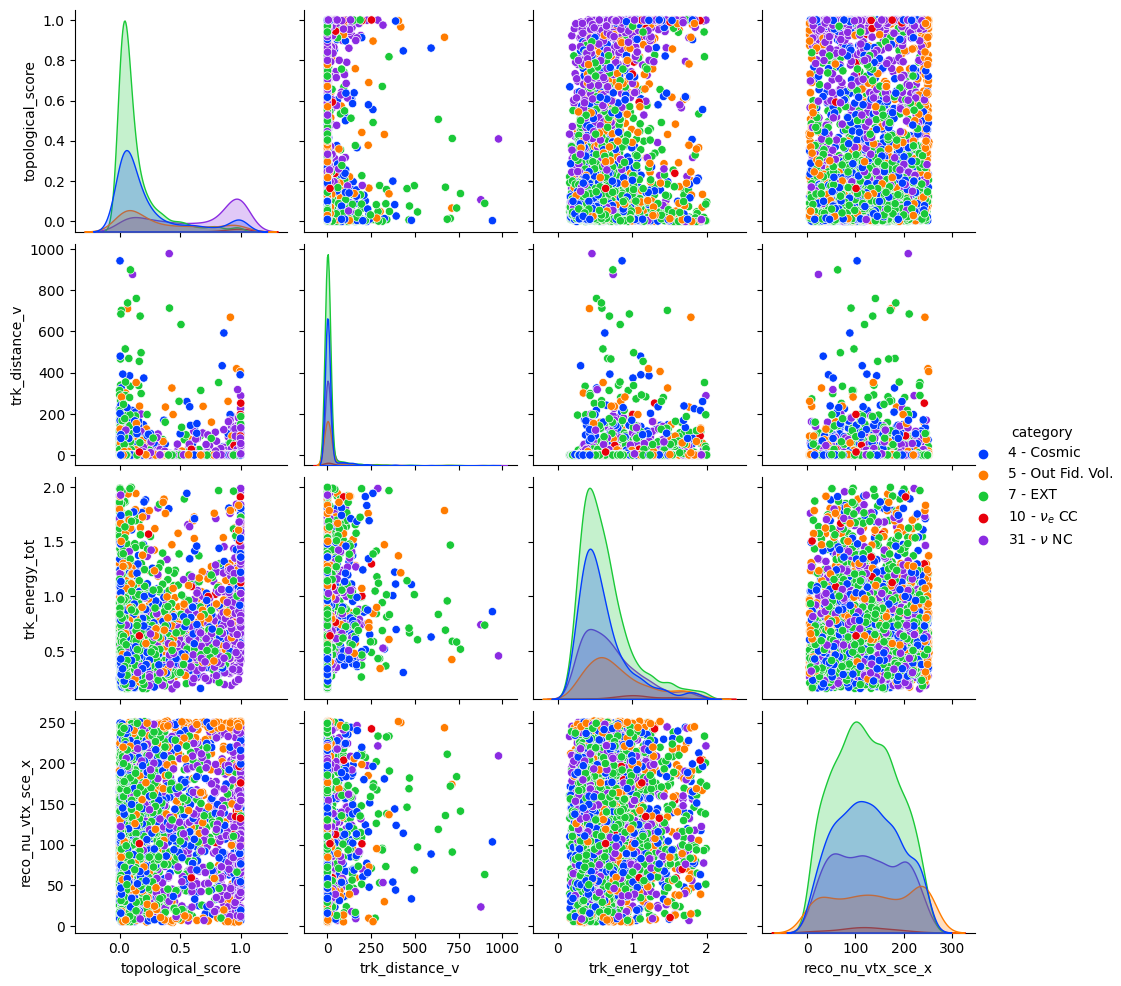

In [72]:
# Plot background events using sns.pairplot
fig = sns.pairplot(dc_MC_EXT_VIS[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# List of categories (excluding signal) in text
ptype_no_mu = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype_no_mu):
   t.set_text(str(t.get_text()) + " - " + str(l))

fig.savefig("MC_data_no_cat21.png")


# Gradient Boosting Classifier

Here we shall modify the shape of our data for its usage in a ML model, then apply the *GradientBoostingClassifier* method from the skikit-learn package.

In [73]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True)
MC_EXT_ML = MC_EXT.sample(int(len(MC_EXT)/10))


# Remove muon neutrino and electron neutrino events.

MC_EXT_ML.drop(MC_EXT_ML[(MC_EXT_ML.category == 21) | (MC_EXT_ML.category == 10)].index, inplace=True)


# Print length of dataframe,, with length N
print("Length of MC dataframe: ", len(MC_EXT_ML))

Length of MC dataframe:  32059


In [74]:
# Setting up input parameters for random forest.
X = MC_EXT_ML[features]
y = np.array(MC_EXT_ML['category'])

# Display shape of X and y, should be (N, 16) (N) where is number of samples.
print("(X) (y) shape: ", X.shape, y.shape)

# Then split the data up into a "training set" and "test set" using train_test_split.
# Keep the random_state=1 in your arguments
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8) # 80/20 training/test split

# Print the shape, should now be 
print("\n(x_train) (y_train) shape: ", x_train.shape, y_train.shape)

print(set(y))

(X) (y) shape:  (32059, 16) (32059,)

(x_train) (y_train) shape:  (25647, 16) (25647,)
{31, 4, 5, 7}


In [77]:
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to search over
params = {'learning_rate': [0.05],
          'n_estimators': [300],
          'max_depth': [6]} # update to include however many parameters desired for the search

# Create a Gradient Boosting Classifier object
gbc = GradientBoostingClassifier()

# Use GridSearchCV to search over the hyperparameters
grid_search = GridSearchCV(gbc, params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_gbc = grid_search.best_estimator_

Best parameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300}


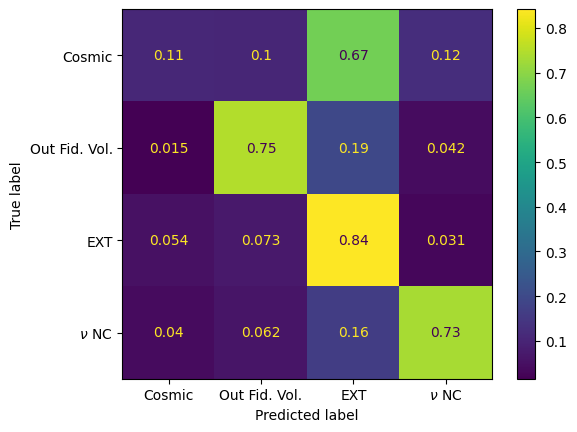

Accuracy: 0.6078082641093858
Best parameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300}


In [78]:
# Use the best model to predict on the test set
y_pred = best_gbc.predict(x_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

# For labelling the confusion matrix
ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ptype_no_mu_e)
disp.plot()
plt.savefig('confusion_matrix.png', bbox_inches='tight', dpi=1000)
plt.show()

# Compute the accuracy
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
print("Accuracy:", accuracy)

print("Best parameters:", grid_search.best_params_)

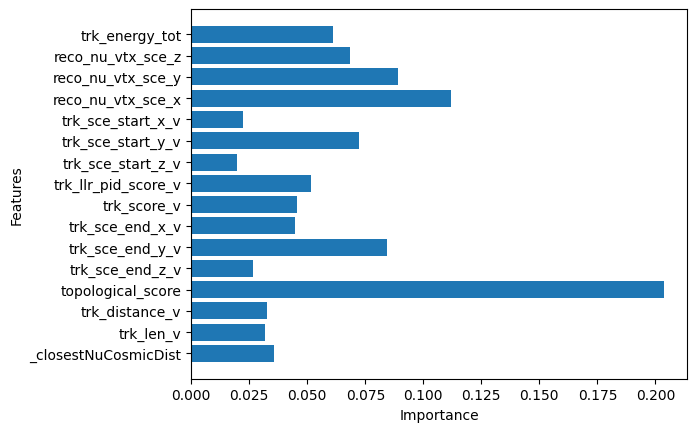

In [79]:
# Plot importance
importance = best_gbc.feature_importances_
ytix = features

plt.barh(range(16), importance)
plt.yticks(range(16), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.savefig('feature_importanceGBC.png', bbox_inches='tight', dpi=1000)
plt.show()

## Investigating the Significance of Cosmic Muons

Although the next 3 most importants features (reco_nu_vtx_sce_y, trk_sce_end_y_v, trk_sce_end_y_v) could be considered statistically insignificant, a justification for their importance could be that cosmic muons come fromm outside the detector, thus are easily identified by the detector orientated in the y direction. This will be investigated here.

In [80]:
#Remove cosmic muons from ML frame
# Setup new database, NEED MORE VALUES
MC_EXT_ML_no_cos = MC_EXT.copy(deep = True)
MC_EXT_ML_no_cos = MC_EXT.sample(int(len(MC_EXT)/10))


# Remove muon neutrino, electron neutrino and cosmic events (EXT and COS).

MC_EXT_ML_no_cos.drop(MC_EXT_ML_no_cos[(MC_EXT_ML_no_cos.category == 21) | (MC_EXT_ML_no_cos.category == 10) | (MC_EXT_ML_no_cos.category == 4) | (MC_EXT_ML_no_cos.category == 7)].index, inplace=True)

In [81]:
#Retrain model
X_no_cos = MC_EXT_ML_no_cos[features]
y_no_cos = np.array(MC_EXT_ML_no_cos['category'])

x_no_cos_train, x_no_cos_test, y_no_cos_train, y_no_cos_test = train_test_split(X_no_cos, y_no_cos, random_state=1, train_size=0.8) # 80/20 training/test split

# Fitting takes the input and "truth" data for classification purposes
best_gbc.fit(x_no_cos_train, y_no_cos_train)


GradientBoostingClassifier(learning_rate=0.05, max_depth=6, n_estimators=300)

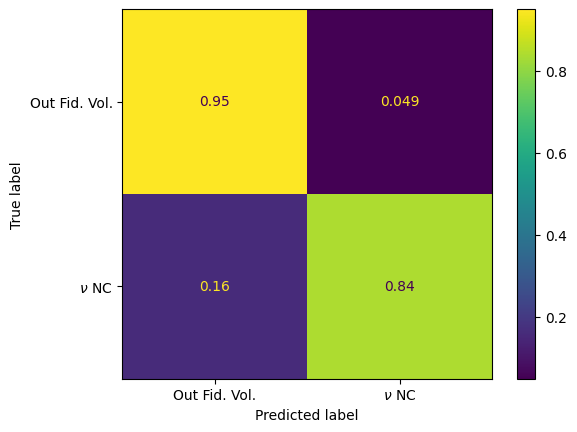

In [85]:
# Produce predictions for the classification of your training dataset using your model:
y_no_cos_pred = best_gbc.predict(x_no_cos_test)
# For labelling your confusion matrix
ptype_no_cos = [r"Out Fid. Vol.", r"$\nu$ NC"]

# plot your confusion matrix
cm_new = confusion_matrix(y_no_cos_test , y_no_cos_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_new, display_labels=ptype_no_cos)
disp.plot()
plt.savefig('confusion_matrix_new.png', bbox_inches='tight', dpi=1000)
plt.show()


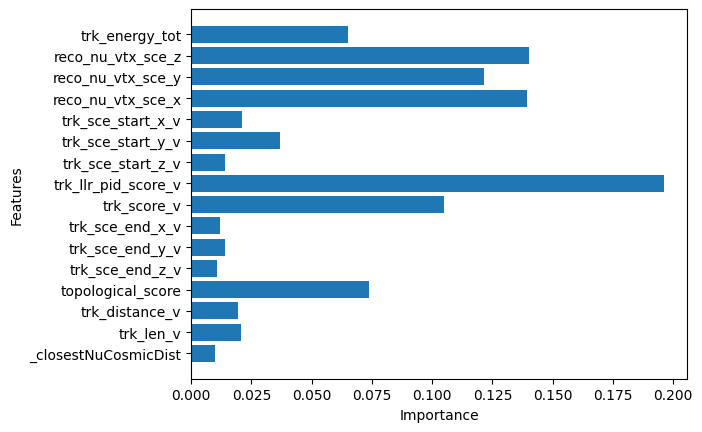

In [86]:
# Plot importance
importance_new = best_gbc.feature_importances_
ytix = features

plt.barh(range(16), importance_new)
plt.yticks(range(16), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.savefig('feature_importance_new.png', bbox_inches='tight', dpi=1000)
plt.show()

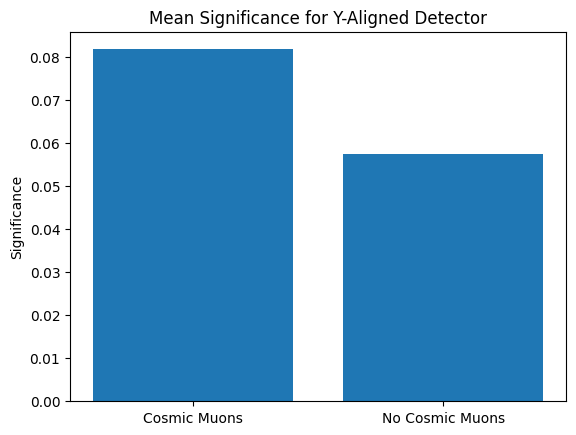

In [87]:
indices = [features.index('reco_nu_vtx_sce_y'), features.index('trk_sce_end_y_v'), features.index('trk_sce_start_y_v')]

importance_values = [importance[index] for index in indices]
new_importance_values = [importance_new[index] for index in indices]

x_values = [0, 1]
x_labels = ['Cosmic Muons', 'No Cosmic Muons']

plt.bar(x_values[0], np.mean(importance_values), label='Cosmic Muons', color='#1f77b4')
plt.bar(x_values[1], np.mean(new_importance_values), label='No Cosmic Muons', color='#1f77b4')

plt.xticks(x_values, x_labels)
plt.ylabel('Significance')
plt.title('Mean Significance for Y-Aligned Detector')
plt.show()

This plot shows that the significance of the features from the y-aligned detector is greatly reduced when not considering any cosmic muons. This supports the suggestion that the significance of the y-features is due to a large number of cosmic muons, which upon arrival are detected by the detector aligned in that direction.

## Cut Background

In this analysis we only consider $\nu_{\mu}$ disappearance, so other events must be cut. This will done by first removing unphysical values and cutting background from the features by descending importance. 

In [88]:
# Final selection after best cuts determined

def bestSelections(frame):
    
    # Basic variables present in dataframe 
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    
    
    cat = frame['category']

    # select the conditions you want to apply, here is an initial condition to get you started.
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000) & (topological > 0.36) & (reco_y > -110) & (reco_y < 112) & (reco_x > 5) & (reco_x < 245) & (trk_start_z_v > 20) & (trk_start_z_v < 980) & (reco_z > 20) & (trk_energy_tot < 3))
    
    
    
    # Apply selection on dataframe
    frame = frame[selection]
    
    return frame

# Plot all variables and decide on selection cuts

['reco_nu_vtx_sce_x', 'trk_sce_end_z_v', 'trk_sce_start_y_v', 'trk_llr_pid_score_v', 'trk_sce_start_x_v', 'trk_energy_tot', 'trk_distance_v', 'topological_score', 'trk_len_v', '_closestNuCosmicDist', 'trk_score_v', 'trk_sce_end_x_v', 'trk_sce_start_z_v', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'category', 'trk_sce_end_y_v']


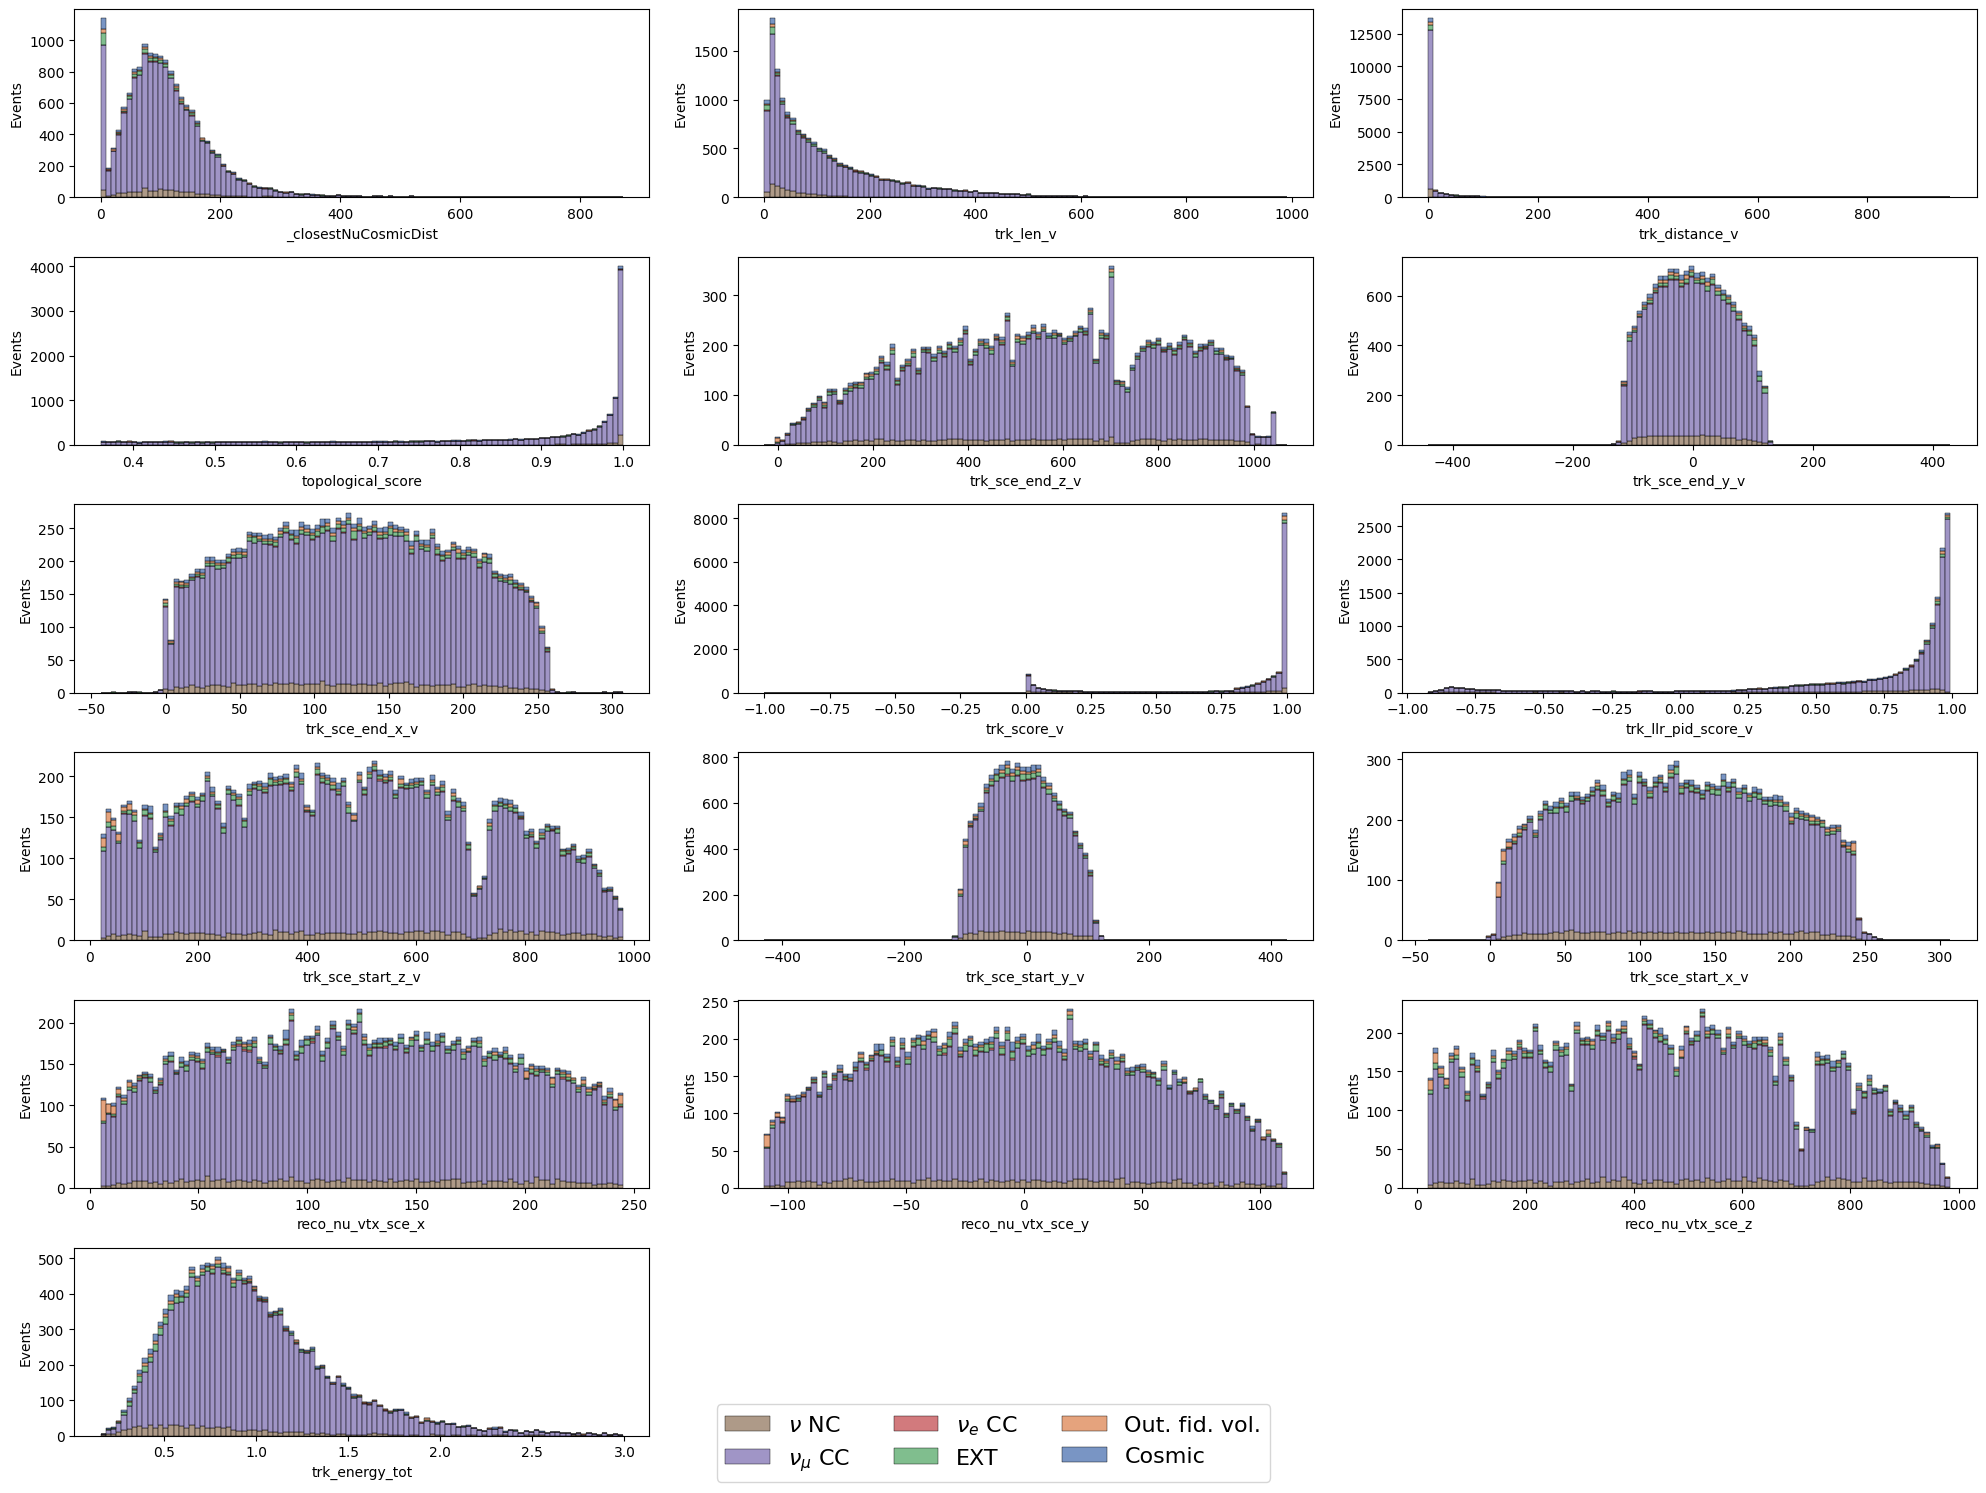

Remaining data:  91104
0.8848129610115911 0.16396699926569047


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,weight
0,124.478148,225.284348,1.286398,21,0.994485,510.146088,-19.997118,191.864334,1.0,0.977081,343.433655,35.865448,54.776821,53.900658,36.203041,342.578735,1.164239,0.000002
1,124.478148,7.850903,131.947891,21,0.994485,389.239197,46.669083,183.160797,0.041434,0.486446,382.998871,47.109879,178.486572,53.900658,36.203041,342.578735,1.164239,0.000002
13,0.278488,75.551727,0.208943,21,0.984373,559.447205,-81.352386,93.415474,0.902821,0.897909,552.531433,-101.085739,165.269608,165.071518,-101.099983,552.576782,0.888904,0.158957
14,0.278488,27.239777,386.296997,21,0.984373,202.525604,113.942856,176.226593,0.979166,0.486213,212.248871,92.057907,188.679962,165.071518,-101.099983,552.576782,0.888904,0.158957
25,116.876312,63.389645,0.633116,21,0.884215,465.989136,-58.62722,82.079384,0.974152,0.926682,410.665558,-87.696518,73.786499,73.916153,-88.119781,410.201050,0.674289,0.158957


In [89]:
# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# removing 'Subevent' from data
MC_EXT = MC_EXT.drop('Subevent', axis = 1)
data = data.drop('Subevent', axis = 1)

original_size = MC_EXT.shape[0]

MC_EXT = bestSelections(MC_EXT)
data_frame = bestSelections(data)



# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT)).intersection(list(data_frame)))
print(all_variables_to_plot)

# Determine number of subplots needed
n_columns = len(features)
n_rows = int(np.ceil(n_columns / 3))

# Set the figure size
fig, axs = plt.subplots(n_rows, 3, figsize=(20, 15))

# Flatten the array of subplots
axs = axs.flatten()

colors = ['red', 'blue', 'green', 'purple', 'yellow', 'orange']
palette = {'1':'red'}

# Loop through columns and plot histograms
for idx, column in enumerate(features):
    BIN = 100
    i = sns.histplot(data=MC_EXT, x=column, multiple="stack", hue="category", palette='deep', weights=MC_EXT['weight'], bins=BIN, legend=False, ax=axs[idx])
    i.set(xlabel=column, ylabel="Events")
    plt.xlim([np.min(MC_EXT[column]), np.max(MC_EXT[column])])

# Remove unused subplots
for i in range(idx + 1, len(axs)):
    fig.delaxes(axs[i])

# Add a single legend in an empty space on the figure
legend_labels = [r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"]
fig.legend(labels=legend_labels, loc='lower center', ncol=3, fontsize=16)
fig.tight_layout()
plt.savefig('feature_histograms', dpi=1000, bbox_inches='tight')
plt.show(fig)

print('Remaining data: ', MC_EXT.shape[0])

# Count the number of 21's in the column
num_21s = MC_EXT[MC_EXT['category'] == 21].shape[0]



purity = num_21s / MC_EXT.shape[0]
efficiency = MC_EXT.shape[0] / original_size

print(purity, efficiency)

#data.head()
MC_EXT.head()

# Exercise 7/8: Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts.

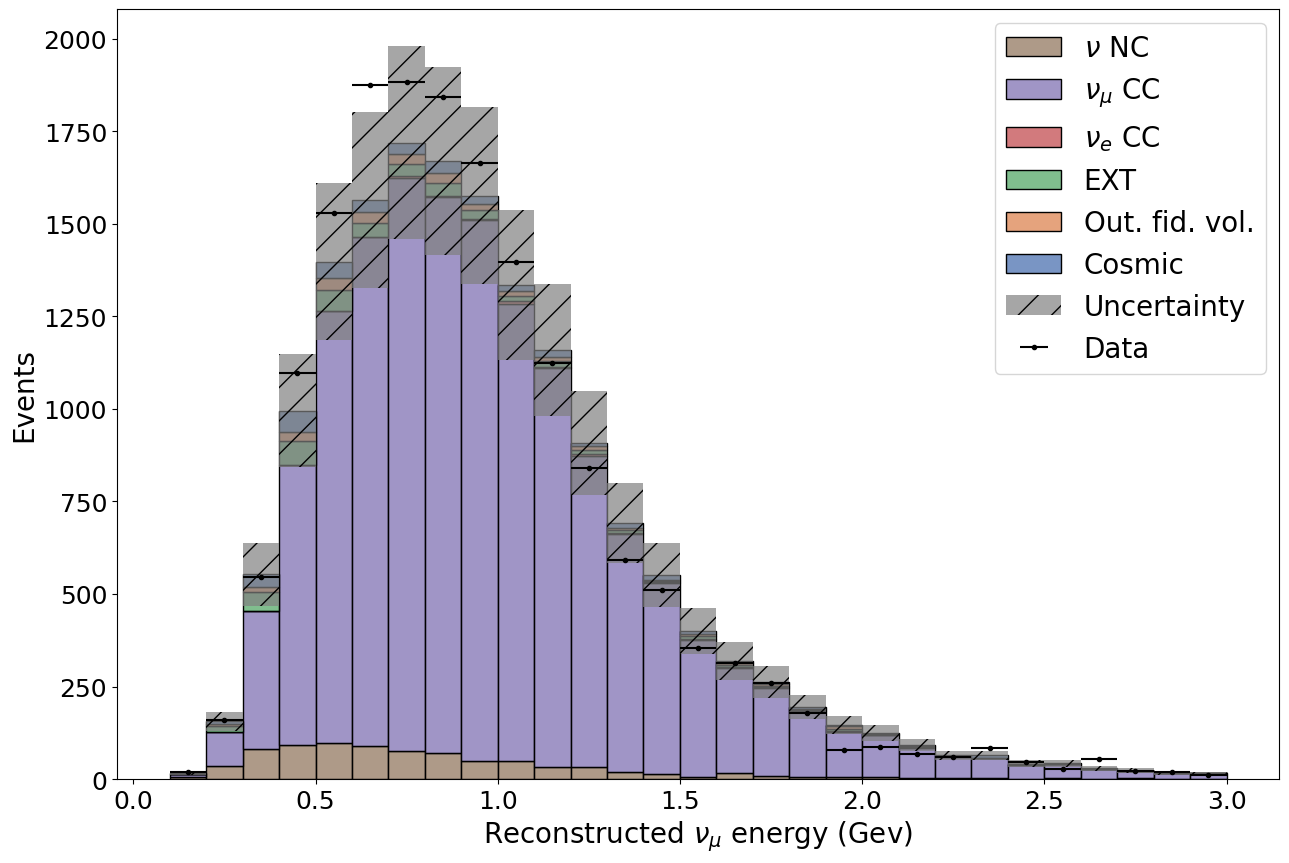

In [90]:
BIN = 30

def histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_fig = True, plot_data = False, logscale = None, dataFrame = None, Stat_func = None):
    
    """
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe
    """    
    frac_unc_syst = 0.15
    
    if (isinstance(MC_frame,pd.core.frame.DataFrame) != True):
        
        print("\"MC_frame\" argument needs to be a pandas dataframe. Cannot plot.")
        
    
    else:
    
        
        fig_MC_temp = plt.figure(figsize=(15,10))

        temp_MC = sns.histplot(data=MC_frame, x= variable , weights = scaling, bins=bins, binrange=xlims, legend = False)
        bars = temp_MC.patches
        MC_heights = [patch.get_height() for patch in bars]
        poisson_error = np.sqrt(MC_heights)
        x = [patch.get_x() for patch in bars]
        w = [patch.get_width() for patch in bars]
        new_bins = [start+w[0]/2 for start in x]
        plt.close(fig_MC_temp)
        
        if(Stat_func is None):
            UNC_frac = 0.15
            UNC = UNC_frac*np.array(MC_heights)
            
            
        if(Stat_func is not None):
            UNC_stat = Stat_func(MC_heights)
            UNC_frac = np.sqrt((0.15**2)+(UNC_stat**2))
            UNC = UNC_frac*np.array(MC_heights)

        fig = plt.figure(figsize=(15,10))
        
        error = np.sqrt(UNC**2 + poisson_error**2)
        labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic", r"Uncertainty"]
        sns.histplot(data=MC_frame, x= variable , hue="category", multiple="stack", palette = 'deep', weights = scaling, bins=bins, binrange=xlims, legend = False);
        plt.bar(new_bins, 2*error, width = w, bottom = np.array(MC_heights)-error, color='grey', alpha=0.7, hatch='/')

        plt.legend(loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic",  r"Uncertainty"], fontsize=20)
    
        if (isinstance(dataFrame,pd.core.frame.DataFrame) and plot_data == True):
            fig_data = plt.figure(figsize=(15,10))
            Data_fig = sns.histplot(data=dataFrame, x=variable, bins=bins, binrange=xlims, legend = False)
            bars = Data_fig.patches
        
            heights = [patch.get_height() for patch in bars]
            x = [patch.get_x() for patch in bars]
            w = [patch.get_width() for patch in bars]
            plt.close(fig_data)
            new_bins = [start+w[0]/2 for start in x]
            plt.errorbar(new_bins, heights , xerr=w[0]/2, fmt='.k')
            plt.legend(loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic",  r"Uncertainty", r"Data"], fontsize=20)

    
        elif(isinstance(dataFrame,pd.core.frame.DataFrame) != True and plot_data == True):
            print("\"dataFrame\" argument needs to be a pandas dataframe." + "\n" + "Just plotting Monte Carlo.")
    
        if variable == 'trk_energy_tot':
            variable = r"Reconstructed $\nu_{\mu}$ energy (Gev)"
    
        if (logscale == True):
            plt.yscale('log')
            
        plt.xlabel(variable,fontsize = 20)
        plt.ylabel("Events",fontsize = 20)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        if (plot_fig == True):
            
            plt.savefig(name+'.jpg', dpi=300) 
            plt.show()
        else:
            plt.close()
        # return the heights of each bin for data and MC
        data_heights = heights
        return MC_heights, data_heights, error, new_bins

MC_heights, data_heights, error, bins = histogram_plot(MC_EXT, 'trk_energy_tot', 29, 'reconstructed_neutrino_energy', MC_EXT['weight'],xlims=[0.1, 3], plot_data = True, logscale = False, dataFrame = data_frame)

These results could be improved by dedicating additional time to optimising the GBC. Although a grid search was employed to identify hyperparameters that enhanced the model, a more comprehensive optimisation could not be conducted due to time constraints. Using a finely tuned GBC would allow the selection cuts to be automated by using the model's score, as opposed to simply using importance as an indicator, which is what was done in this analysis.

# Oscillation and Fitting

In [91]:
from scipy.optimize import minimize

L = 0.470 # km
x0 = [0.5, 1]
centers = np.arange(0.15, 2.96, 0.1) # bin centers

def calculate_chi2(params, MC_heights, data_heights, errors):
    theta, delta_m_2 = params
    scale_factor = 1 - (np.sin(2 * theta)**2 * (np.sin(1.27 * delta_m_2 * L / centers))**2)
    scaled_MC = MC_heights * scale_factor
    return np.sum(((scaled_MC - data_heights)**2) / (errors**2))

def find_min_chi2(MC_heights, data_heights, errors, L):
    result = minimize(calculate_chi2, x0, args=(MC_heights, data_heights, errors), method='nelder-mead')
    return result.fun, result.x

def get_optimal_scale(MC_heights, data_heights, errors, L):
    min_chi2, optimal_params = find_min_chi2(MC_heights, data_heights, errors, L)
    return min_chi2, optimal_params

min_chi2, optimal_params = get_optimal_scale(MC_heights, data_heights, error, L)
print("Minimized chi2: {0:.4f}".format(min_chi2 / (BIN - len(x0))))
print("Optimal parameters: theta = {0:.4g}, delta_m_2 = {1:.4g}".format(*optimal_params))

#optimal_params[0] = np.pi / 4

scale_factor = 1 - (np.sin(2 * optimal_params[0])**2 * (np.sin(1.27 * optimal_params[1] * L / centers))**2)

Minimized chi2: 1.3936
Optimal parameters: theta = 1.249e-08, delta_m_2 = 1.19


The minimum $\chi^{2}$ yields best fit parameters that correspond to minimal oscillation. This is consistent since the figure above does not show any evidence of event deficit.

# Oscillation Parameter Scan
Draw contours in the plane of $\Delta m_{14}^{2}$ and $\theta_{\mu e}$. Using the $\chi^{2}$ values, exclude the region of parameter space beyond the 90% confidence level.

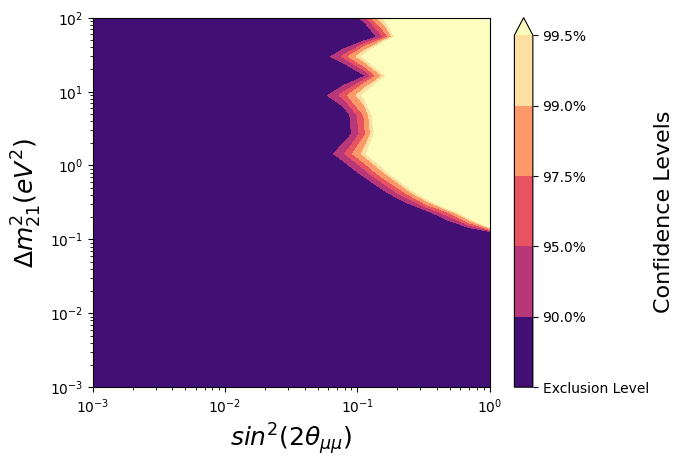

38.88620210537046
0.026366508987303583 54.555947811685144


In [95]:
def get_heights(MC_EXT, data_frame, params, L, BIN, data_heights):

    scale_factor = 1 - (params[0] * (np.sin(1.27 * params[1] * L / centers)**2))


    # Create an empty list to store the scaled values
    scaled_values = []

    # Loop through each value in MC_EXT['trk_energy_tot']
    for value in MC_EXT['trk_energy_tot']:
        # Determine which bin the value belongs to
        bin_index = np.digitize([value], np.arange(0.1, 3.1, 0.1))[0] - 1
        # Scale the value using the appropriate factor from scale_factor
        scaled_value = scale_factor[bin_index]
        # Append the scaled value to the list of scaled values
        scaled_values.append(scaled_value)

    # Add the list of scaled values as a new column in MC_EXT
    MC_EXT['oscillation_weight'] = scaled_values

    data_frame['scaled_trk_energy'] = data_frame['trk_energy_tot']

    fig_MC_temp = plt.figure(figsize=(15,10))

    temp_MC = sns.histplot(data=MC_EXT, x='trk_energy_tot' , weights =MC_EXT['weight']*MC_EXT['oscillation_weight'], bins=29, binrange=[0.1, 3], legend = False)
    bars = temp_MC.patches
    MC_heights = [patch.get_height() for patch in bars]
    poisson_error = np.sqrt(MC_heights)
    plt.close(fig_MC_temp)
    
    UNC_frac = 0.15
    UNC = UNC_frac*np.array(MC_heights)
        
    error = np.sqrt(UNC**2 + poisson_error**2)
    
    return MC_heights, error

def get_reduced_chi2(MC, data, errors):

    chi2 = np.sum(((np.array(MC) - np.array(data))**2) / (np.array(errors)**2))

    return (chi2)

sin_2_range = np.logspace(-3, 0, 20)
delta_m_range = np.logspace(-3, 2, 20)

sin_2, delta_m = np.meshgrid(sin_2_range, delta_m_range)

chi2 = np.zeros_like(sin_2)
for i in range(len(sin_2_range)):
    for j in range(len(delta_m_range)):
        new_height, new_error = get_heights(MC_EXT, data_frame, [sin_2[i][j], delta_m[i][j]], L, BIN, data_heights)
        chi2[i][j] = get_reduced_chi2(new_height, data_heights, new_error)

min_chi2 = np.min(chi2)
min_index = np.unravel_index(np.argmin(chi2), chi2.shape)
optimal_sin_2 = sin_2[min_index]
optimal_delta_m = delta_m[min_index]

figure = plt.figure()
ax = figure.add_subplot(111)

cs = ax.contourf(sin_2, delta_m, chi2, levels = [min_chi2, min_chi2 + 4.61, min_chi2 + 5.99, min_chi2+7.378, min_chi2 + 9.21, min_chi2+10.597], extend='max', cmap = 'magma') 
cbar = plt.colorbar(cs, extend='max')
cbar.set_label('Confidence Levels', fontsize=16)


ax.set_xlabel(r'$sin^2(2\theta_{\mu\mu})$', fontsize=18)
ax.set_ylabel(r'$\Delta m_{21}^{2}  (eV^{2})$', fontsize=18)
labels = [r"Exclusion Level", "90.0%", "95.0%", "97.5%", "99.0%", "99.5%"]
cbar.ax.set_yticklabels(labels)
ax.set_xscale('log')
ax.set_yscale('log')
plt.savefig('contour.png', dpi=500, bbox_inches='tight')

plt.show()

print(min_chi2)
print(optimal_sin_2, optimal_delta_m)


# 3+1 Framework Neutrino disappearance.

To convert from the 3-flavour oscillation to the 3+1 framework, we change the $\sin^{2}(2\theta_{\mu\mu})$ parameter to $\sin^{2}(2\theta_{\mu e})$. This new factor is given by $$ \sin^{2}(2\theta_{\mu e}) = \left(1-\sqrt{1-\sin^{2}(2\theta_{14})}\right) \left(1-\sqrt{1-\sin^{2}(2\theta_{\mu\mu})}\right),$$
where use $\sin^{2}(2\theta_{14}) = 0.24$.

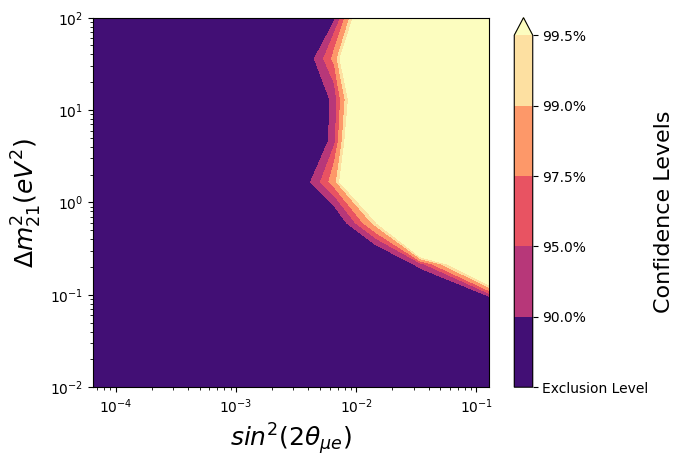

39.00865027160779
4.6415888336127775 0.026366508987303583


In [96]:
sin_2_range = np.logspace(-3, 0, 10)
delta_m_range = np.logspace(-2, 2, 10)

sin_2, delta_m = np.meshgrid(sin_2_range, delta_m_range)

# Transformation to sin_2_mu_e
sin_2_mu_e = (1 - np.sqrt(1 - 0.24)) * (1 - np.sqrt(1 - sin_2))



chi2 = np.zeros_like(sin_2)
for i in range(len(sin_2_range)):
    for j in range(len(delta_m_range)):
        new_height, new_error = get_heights(MC_EXT, data_frame, [sin_2[i][j], delta_m[i][j]], L, BIN, data_heights)
        chi2[i][j] = get_reduced_chi2(new_height, data_heights, new_error)

figure = plt.figure()
ax = figure.add_subplot(111)

min_chi2 = np.min(chi2)
min_index = np.unravel_index(np.argmin(chi2), chi2.shape)
optimal_sin_2_mu_e = sin_2_mu_e[min_index]
optimal_delta_m = delta_m[min_index]

cs = ax.contourf(sin_2_mu_e, delta_m, chi2, levels=[min_chi2, min_chi2 + 4.61, min_chi2 + 5.99, min_chi2+7.378, min_chi2 + 9.21, min_chi2+10.597], extend='max', cmap='magma') 
cbar = plt.colorbar(cs, extend='max')
cbar.set_label('Confidence Levels', fontsize=16)

ax.set_xlabel(r'$sin^2(2\theta_{\mu e})$', fontsize=18)
ax.set_ylabel(r'$\Delta m_{21}^{2}  (eV^{2})$', fontsize=18)
labels = [r"Exclusion Level", "90.0%", "95.0%", "97.5%", "99.0%", "99.5%"]
cbar.ax.set_yticklabels(labels)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xbound(1e-2, 1e0)
plt.savefig('contour_31.png', dpi=500, bbox_inches='tight')

plt.show()

# Compare this result to MiniBooNE and LSND

Results are extracted from MiniBooNE (orange) and LSND (blue)

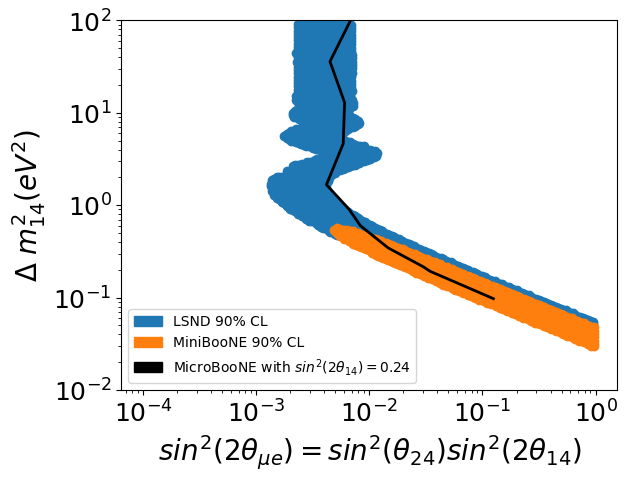

In [97]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()

# Define colors
lsnd_color = 'tab:blue'
miniboone_color = 'tab:orange'

# Plot data
plt.plot(LSND_data[:,0], LSND_data[:,1], 'o', color=lsnd_color, label='LSND 90% CL')
plt.plot(MiniBooNE_data[:,0], MiniBooNE_data[:,1], 'o', color=miniboone_color, label='MiniBooNE 90% CL')
contour = plt.contour(sin_2_mu_e, delta_m, chi2, levels=[min_chi2 + 4.61], colors='k', linewidths=2)
plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$', fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2 (eV^{2})$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')

# Add legend
LSND_patch = mpatches.Patch(color=lsnd_color, label='LSND 90% CL')
MiniBooNE_patch = mpatches.Patch(color=miniboone_color, label='MiniBooNE 90% CL')
contour_patch = mpatches.Patch(color='k', label=r'MicroBooNE with $sin^{2}(2\theta_{14}) = 0.24$')
plt.legend(handles=[LSND_patch, MiniBooNE_patch, contour_patch], fontsize=10)
plt.savefig('miniBooNE.png', dpi=500, bbox_inches='tight')
plt.show()

The 90% confidence levels for MiniBooNE, LSND and MicroBooNE in the 3+1 framework. The MiniBooNE and LSND levels fill the region in parameter space in which a sterile neutrino is allowed to exist. The exclusion zone is set to be beyond 90% confidence level. It can be seen in the figure above that this analysis was able to exclude regions of parameter space that previous results had allowed for the existence of sterile neutrinos. These results are consistent with previous MicroBooNE analysis.